# 本项目分工如下：


1.   彭欣悦    组长    20%    完成工程报告的撰写汇总，处理数据集，卷积神经网络算法代码实现；多模型效果对比分析；报告的第一/二撰写，进行工作协调，进度推进，合理分工。
2.   孙雯    组员    20%    完成工程报告排版，人工神经网络算法实现，gradio页面展示，报告第三部分撰写
3. 刘聪    组员    15%    随机森林算法实现，将项目部署到hugging face，完成报告第四部分撰写
4. 王思涵    组员    15%    决策树算法实现，完成报告第五部分撰写
5. 袁誉玮    组员    15%    KNN算法实现，完成报告第六部分撰写
6. 张万里    组员    15%    SVM算法实现，完成报告第七部分撰写





# 利用多层感知机进行服装图像的分类
数据集使用FashionMNIST 数据集，该数据集包含 10 个类别的 70,000 个灰度图像。这些图像以低分辨率（28x28 像素）展示了单件衣物。数据集的来源是kaggle上的数据集Fashion MNIST
https://www.kaggle.com/datasets/zalando-research/fashionmnist/code




本实验使用了 [tf.keras](https://tensorflow.google.cn/guide/keras)，它是 TensorFlow 中用来构建和训练模型的高级 API。

## 1 导包等前期准备工作

###1.1 导入必要的包

In [ ]:
# TensorFlow 和 tf.keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

print(tf.__version__)

2.15.0


由于本次实验是在谷歌的colab上运行的，所以接下来要将此文件所在的云盘挂载在colab上

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1.2 导入必要的字体

引入中文字体（因为colab服务器上没有中文字体），要用matplotlib画图，注释必须要中文

In [ ]:
zhfont = mpl.font_manager.FontProperties(fname='/content/drive/MyDrive/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 2 数据处理相关

###2.1 导入 Fashion MNIST 数据集

本实验使用 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 数据集，该数据集包含 10 个类别的 70,000 个灰度图像。这些图像以低分辨率（28x28 像素）展示了单件衣物，如下所示：

<table>
  <tr><td>     <img alt="Fashion MNIST sprite" src="https://tensorflow.google.cn/images/fashion-mnist-sprite.png"> </td></tr>
  <tr><td align="center">     <b>图 1.</b>  <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST 样本</a></td></tr>
</table>

Fashion MNIST 旨在临时替代经典 [MNIST](http://yann.lecun.com/exdb/mnist/) 数据集，后者常被用作计算机视觉机器学习程序的“Hello, World”。MNIST 数据集包含手写数字（0、1、2 等）的图像，其格式与将使用的衣物图像的格式相同。

使用 Fashion MNIST 来实现多样化，因为它比常规MNIST更具挑战性。这两个数据集都相对较小，都用于验证某个算法是否按预期工作。对于代码的测试和调试，它们都是很好的案例。

在本实验中，我们使用 60,000 张图像来训练网络，使用 10,000 张图像来评估网络学习对图像进行分类的准确程度。直接从 TensorFlow 中访问 Fashion MNIST，接下来直接从 TensorFlow 中导入和加载 Fashion MNIST 数据：

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

加载数据集会返回四个 NumPy 数组：

- `train_images` 和 `train_labels` 数组是*训练集*，即模型用于学习的数据。
- *测试集*、`test_images` 和 `test_labels` 数组会被用来对模型进行测试。

图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。*标签*是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装*类*：

<table>
  <tr>
    <th>标签</th>
    <th>类</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T恤/上衣</td>
  </tr>
  <tr>
    <td>1</td>
    <td>裤子</td>
  </tr>
    <tr>
    <td>2</td>
    <td>套头衫</td>
  </tr>
    <tr>
    <td>3</td>
    <td>连衣裙</td>
  </tr>
    <tr>
    <td>4</td>
    <td>外套</td>
  </tr>
    <tr>
    <td>5</td>
    <td>凉鞋</td>
  </tr>
    <tr>
    <td>6</td>
    <td>衬衫</td>
  </tr>
    <tr>
    <td>7</td>
    <td>运动鞋</td>
  </tr>
    <tr>
    <td>8</td>
    <td>包</td>
  </tr>
    <tr>
    <td>9</td>
    <td>短靴</td>
  </tr>
</table>

每个图像都会被映射到一个标签。由于数据集不包括*类名称*，将它们存储在下方，供稍后绘制图像时使用：

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###2.2 浏览数据

在训练模型之前，先浏览一下数据集的格式。以下代码显示训练集中有 60,000 个图像，每个图像由 28 x 28 的像素表示：

In [ ]:
train_images.shape

(60000, 28, 28)

同样，训练集中有 60,000 个标签：

In [ ]:
len(train_labels)

60000

每个标签都是一个 0 到 9 之间的整数：

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

测试集中有 10,000 个图像。同样，每个图像都由 28x28 个像素表示：

In [ ]:
test_images.shape

(10000, 28, 28)

测试集包含 10,000 个图像标签：

In [ ]:
len(test_labels)

10000

###2.3 预处理数据

在训练网络之前，必须对数据进行预处理。查看第一个图像，会看到像素值处于 0 到 255 之间：

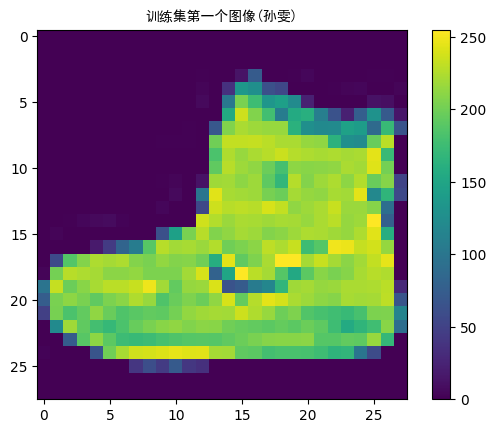

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.title(u"训练集第一个图像(孙雯)",fontproperties = zhfont)
plt.grid(False)
plt.show()

将这些值缩小至 0 到 1 之间，然后将其馈送到神经网络模型。为此，将这些值除以 255，同时以相同的方式对*训练集*和*测试集*进行预处理：

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

为了验证数据的格式是否正确，显示*训练集*中的前 25 个图像，并在每个图像下方显示类名称。

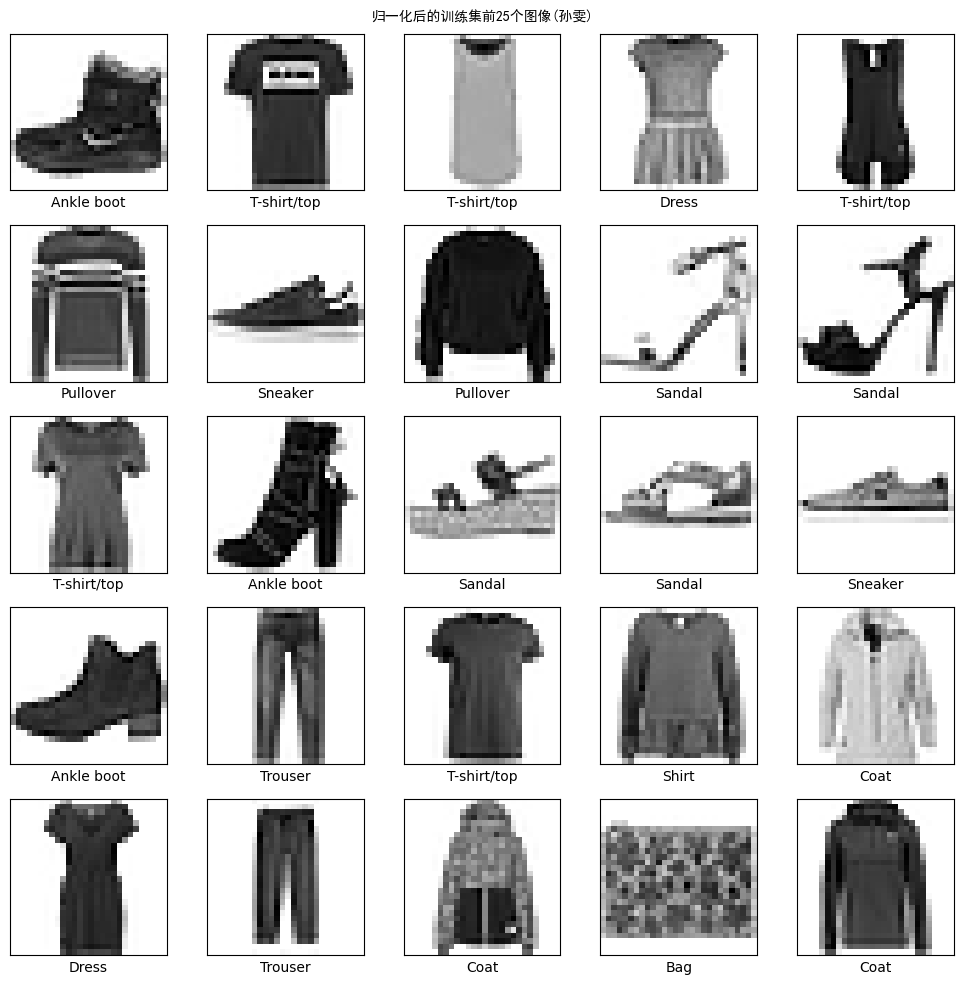

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle(u"归一化后的训练集前25个图像(孙雯)",fontproperties = zhfont)
plt.tight_layout()
plt.show()

从以上结果可以看出，数据格式没有问题，图片和标签是一一对应的

##3 构建模型

构建多层感知机需要先配置模型的层，然后再编译模型。

###3.1 设置层

神经网络的基本组成部分是<em>层</em>。层会从向其馈送的数据中提取表示形式。
大多数深度学习都包括将简单的层链接在一起，大多数层（如 `tf.keras.layers.Dense`）都具有在训练期间才会学习的参数。

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

该网络的第一层 `tf.keras.layers.Flatten` 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。

展平像素后，网络会包括两个 `tf.keras.layers.Dense` 层的序列。它们是密集连接或全连接神经层。第一个 `Dense` 层有 128 个节点（或神经元），激活函数为relu。第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。

###3.2 编译模型

在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的<em>编译</em>步骤中添加的：

- <em>损失函数</em> - 测量模型在训练期间的准确程度。你希望最小化此函数，以便将模型“引导”到正确的方向上。
- <em>优化器</em> - 决定模型如何根据其看到的数据和自身的损失函数进行更新。
- <em>指标</em> - 用于监控训练和测试步骤。以下示例使用了*准确率*，即被正确分类的图像的比率。

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##4 训练神经网络

训练神经网络模型需要执行以下步骤：

1. 将训练数据馈送给模型。在本实验中，训练数据位于 `train_images` 和 `train_labels` 数组中。
2. 多层感知机通过学习将图像和标签关联起来。
3. 多层感知机对测试集（在本实验中为 `test_images` 数组）进行预测。
4. 验证预测是否与 `test_labels` 数组中的标签相匹配。


###4.1 向模型馈送数据

开始训练，调用 <code>model.fit</code> 方法，训练epoch数为10次,并且从训练集中选择20%的数据作为验证集

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5170 - accuracy: 0.8193 - val_loss: 0.4350 - val_accuracy: 0.8443
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3861 - accuracy: 0.8608 - val_loss: 0.3709 - val_accuracy: 0.8659
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3457 - accuracy: 0.8745 - val_loss: 0.4053 - val_accuracy: 0.8518
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3188 - accuracy: 0.8841 - val_loss: 0.3498 - val_accuracy: 0.8772
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3001 - accuracy: 0.8895 - val_loss: 0.3339 - val_accuracy: 0.8787
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2846 - accuracy: 0.8948 - val_loss: 0.3249 - val_accuracy: 0.8813
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2721 - accuracy: 0.8992 - val_loss: 0.3397 - val_accuracy:

在模型训练期间，会显示损失和准确率指标。此模型在训练数据上的准确率达到了 0.91（或 91%）左右。

画出模型在训练集以及验证集上得损失

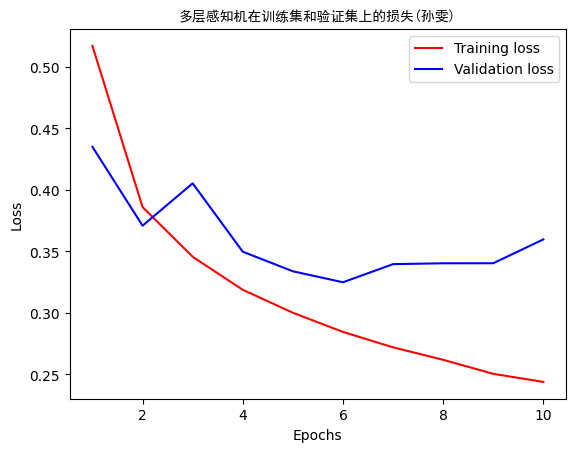

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title(u"多层感知机在训练集和验证集上的损失(孙雯)",fontproperties = zhfont)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###4.2 评估准确率

接下来，比较多层感知机在测试数据集上的表现：

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3978 - accuracy: 0.8660 - 634ms/epoch - 2ms/step

Test accuracy: 0.8659999966621399


结果表明，模型在测试数据集上的准确率略低于训练数据集。训练准确率和测试准确率之间的差距代表*过拟合*。过拟合是指机器学习模型在新的、以前未曾见过的输入上的表现不如在训练数据上的表现。过拟合的模型会“记住”训练数据集中的噪声和细节，从而对模型在新数据上的表现产生负面影响。

##5 使用模型预测

###5.1 进行预测

模型经过训练后，使用它对一些图像进行预测。附加一个 Softmax 层，将模型的线性输出 [logits](https://developers.google.com/machine-learning/glossary#logits) 转换成更容易理解的概率。

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


在上例中，模型预测了测试集中每个图像的标签，以下展示第一个预测结果：

In [ ]:
predictions[0]

array([6.1814802e-08, 8.8895176e-09, 5.2536446e-08, 1.2435541e-08,
       7.3469081e-08, 5.0964430e-03, 6.7334116e-07, 8.4269168e-03,
       5.7846112e-08, 9.8647577e-01], dtype=float32)

预测结果是一个包含 10 个数字的数组。它们代表模型对 10 种不同服装中每种服装的“置信度”。通过np.argmax查看哪个标签的置信度值最大：

In [ ]:
np.argmax(predictions[0])

9

因此，该模型非常确信这个图像是短靴，或 `class_names[9]`。通过检查测试标签发现这个分类是正确的：

In [ ]:
test_labels[0]

9

将其绘制成图表，查看模型对于全部 10 个类的预测。

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

###5.2 验证预测结果

在模型经过训练后，使用它对一些图像进行预测。

以下是第 0 、12个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。

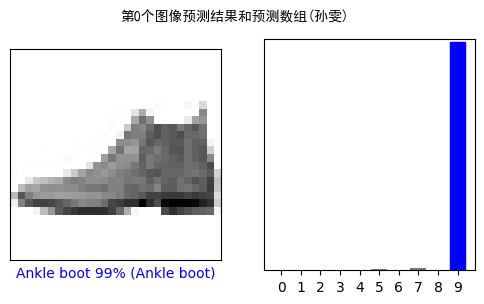

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.suptitle(u"第0个图像预测结果和预测数组(孙雯)",fontproperties = zhfont)
plt.show()

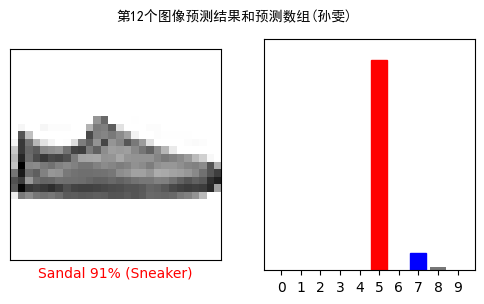

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.suptitle(u"第12个图像预测结果和预测数组(孙雯)",fontproperties = zhfont)
plt.show()

以下用模型的预测绘制几张图像。

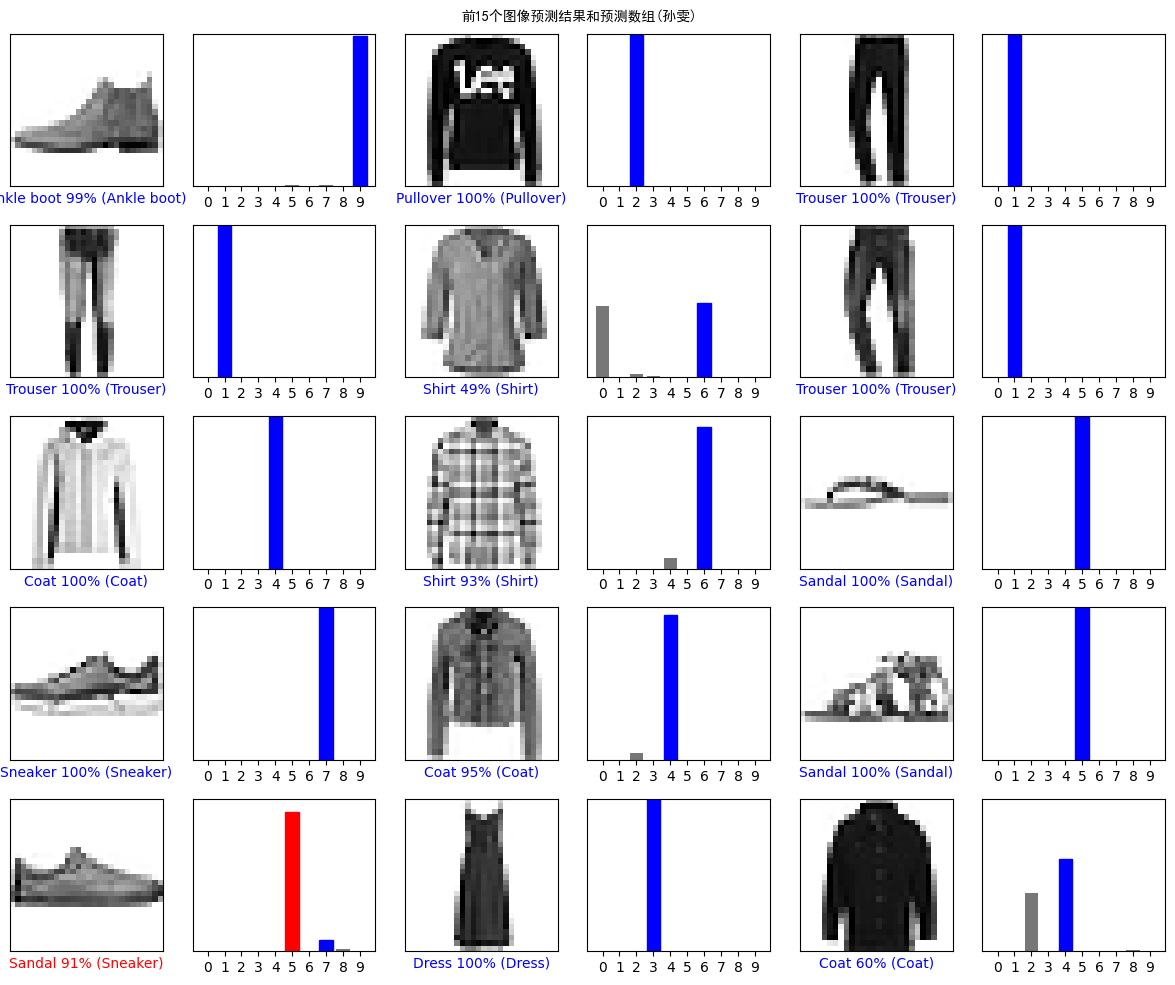

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.suptitle(u"前15个图像预测结果和预测数组(孙雯)",fontproperties = zhfont)
plt.tight_layout()
plt.show()

从以上结果图可以看出，即使置信度很高，模型也可能出错。

###5.3 使用训练好的模型

最后，使用训练好的模型对单个图像进行预测。

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 模型经过了优化，可同时对一个*批*或一组样本进行预测。因此，即便只使用一个图像，也需要将其添加到列表中：

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


现在预测这个图像的正确标签：

In [ ]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 52ms/step
[[3.9084829e-04 2.4158295e-11 9.9773538e-01 3.3877630e-11 1.4047049e-03
  1.2984351e-09 4.6904947e-04 1.7834718e-16 9.1851167e-09 6.0907757e-10]]


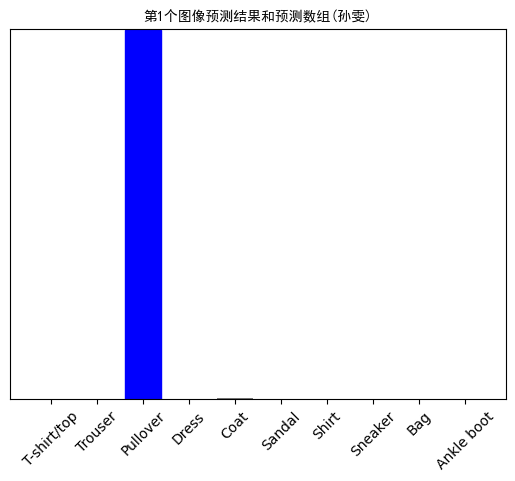

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.title(u"第1个图像预测结果和预测数组(孙雯)",fontproperties = zhfont)
plt.show()

`keras.Model.predict` 会返回一组列表，每个列表对应一批数据中的每个图像。在批次中获取对我们（唯一）图像的预测：

In [ ]:
np.argmax(predictions_single[0])

2

该模型会按照预期预测标签。

# 基于随机森林的服装图像分类


## 1 导入必要的包

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

## 2 加载数据集


In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## 3 数据预处理

将图像数据展开为一维数组，将训练数据（28，28）的形状展开为748

In [ ]:
n_samples, width, height = train_images.shape
train_images = train_images.reshape((n_samples, width * height))

n_samples, width, height = test_images.shape
test_images = test_images.reshape((n_samples, width * height))

### 将数据集划分为训练集和验证集

将训练集的20%作为验证集

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


## 4 模型训练

初始化随机森林分类器，树的数量设置为100，训练模型

In [ ]:
# 初始化随机森林分类器
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5 模型在验证集上预测

In [ ]:
# 在验证集上进行预测
val_predictions = rf_clf.predict(X_val)

# 输出验证集的分类报告和准确率
print("Validation Classification Report:\n", classification_report(y_val, val_predictions))
print("Validation Accuracy: ", accuracy_score(y_val, val_predictions))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1202
           1       1.00      0.97      0.98      1219
           2       0.79      0.82      0.81      1205
           3       0.87      0.91      0.89      1184
           4       0.77      0.83      0.80      1202
           5       0.97      0.96      0.97      1211
           6       0.75      0.60      0.67      1218
           7       0.94      0.94      0.94      1159
           8       0.96      0.97      0.97      1197
           9       0.95      0.96      0.95      1203

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

Validation Accuracy:  0.8814166666666666


从以上结果可以看出，随机森林模型在验证集上的准确率为88.14%，同时打印了其在各个类别上的指标，例如精确率，召回率和f1score，support表示每个类别的数量

## 6 模型在测试集上预测

In [ ]:
# 在测试集上进行预测
test_predictions = rf_clf.predict(test_images)

# 输出测试集的分类报告和准确率
print("Test Classification Report:\n", classification_report(test_labels, test_predictions))
print("Test Accuracy: ", accuracy_score(test_labels, test_predictions))

Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.77      0.80      0.78      1000
           3       0.87      0.90      0.88      1000
           4       0.76      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.59      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Test Accuracy:  0.874


从以上结果可以看出随机森林模型在测试集上的准确率为87.40%，同时打印了其在各个类别上的指标，例如精确率，召回率和f1score，support表示每个类别的数量

## 7 可视化结果

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


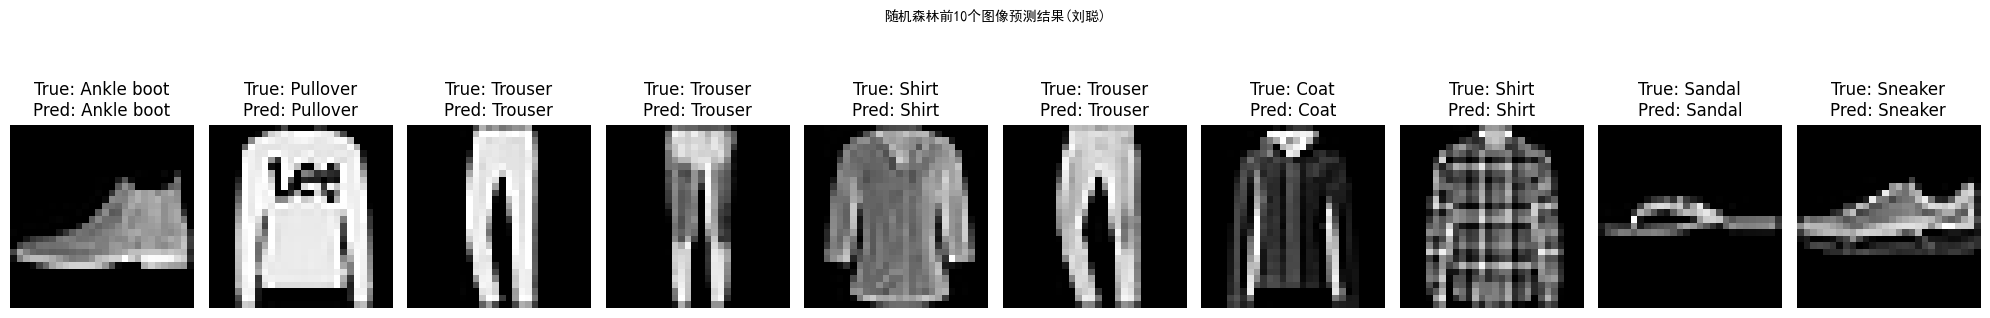

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import seaborn as sns
import matplotlib as mpl

# 定义类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
from google.colab import drive
drive.mount('/content/drive')
zhfont = mpl.font_manager.FontProperties(fname='/content/drive/MyDrive/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 可视化一些测试图像及其预测标签
def plot_images(images, labels, predictions, class_names, start_idx=0, num=10):
    plt.figure(figsize=(20, 4))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[start_idx + i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[labels[start_idx + i]]}\nPred: {class_names[predictions[start_idx + i]]}")
        plt.axis('off')
    plt.suptitle(u"随机森林前10个图像预测结果(刘聪)",fontproperties = zhfont)
    plt.tight_layout()
    plt.show()

# 可视化前10个测试图像及其预测结果
plot_images(test_images, test_labels, test_predictions, class_names, start_idx=0, num=10)

以上展示的是随机森林模型预测测试集前十个图像结果图，可以看到结果预测正确

### 混淆矩阵

打印随机森林的多分类混淆矩阵，纵向坐标为真实值（类别），横向坐标为预测值（类别），对角线即模型预测正确的数目

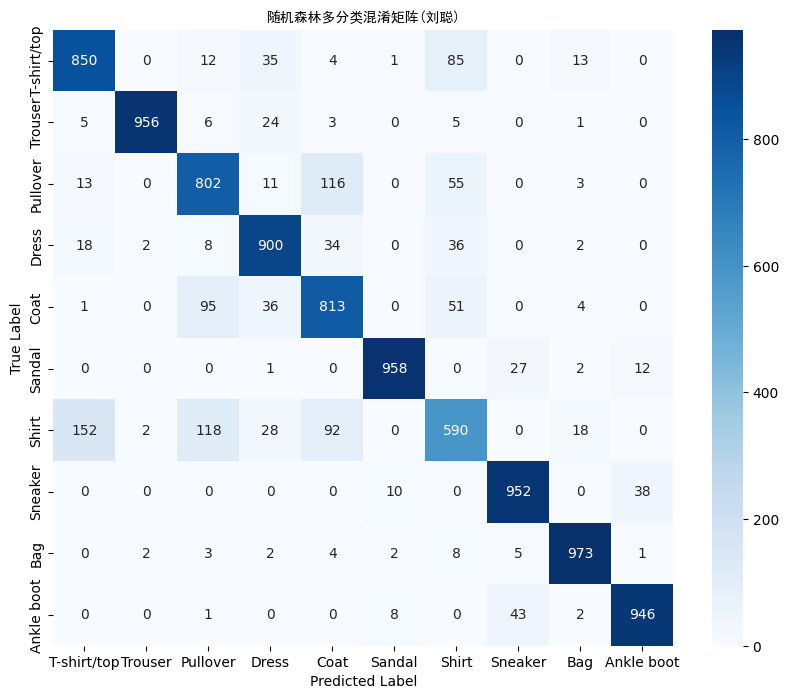

In [ ]:
# 可视化混淆矩阵
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(u"随机森林多分类混淆矩阵(刘聪)",fontproperties = zhfont)
plt.show()

# 基于决策树的服装图像分类

## 1 导入必要的包



In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns

## 2 加载数据集并预处理

将图像数据展开为一维数组，将训练数据（28，28）的形状展开为748,同时将训练集的20%作为验证集

In [ ]:
# 加载数据
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 将图像数据展开为一维数组
n_samples, width, height = train_images.shape
train_images = train_images.reshape((n_samples, width * height))

n_samples, width, height = test_images.shape
test_images = test_images.reshape((n_samples, width * height))

# 将数据集划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


## 3 定义决策树模型并训练

In [ ]:
# 初始化决策树分类器
dt_clf = DecisionTreeClassifier(random_state=42)

# 训练模型
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 4 模型预测

In [ ]:
# 在验证集上进行预测
val_predictions = dt_clf.predict(X_val)

# 输出验证集的分类报告和准确率
print("Validation Classification Report:\n", classification_report(y_val, val_predictions))
print("Validation Accuracy: ", accuracy_score(y_val, val_predictions))
# 在测试集上进行预测
test_predictions = dt_clf.predict(test_images)

# 输出测试集的分类报告和准确率
print("Test Classification Report:\n", classification_report(test_labels, test_predictions))
print("Test Accuracy: ", accuracy_score(test_labels, test_predictions))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1202
           1       0.95      0.95      0.95      1219
           2       0.68      0.69      0.68      1205
           3       0.80      0.80      0.80      1184
           4       0.66      0.68      0.67      1202
           5       0.91      0.90      0.90      1211
           6       0.55      0.54      0.54      1218
           7       0.86      0.89      0.88      1159
           8       0.91      0.89      0.90      1197
           9       0.92      0.89      0.90      1203

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000

Validation Accuracy:  0.7971666666666667
Test Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.95    

从上述结果可以看出，决策树模型在验证集上的准确率为79.72%，在测试集上的准确率为78.94%，同时还打印了各个类别的精确率（precision）、召回率（recall）以及F1score。

## 5 结果可视化

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


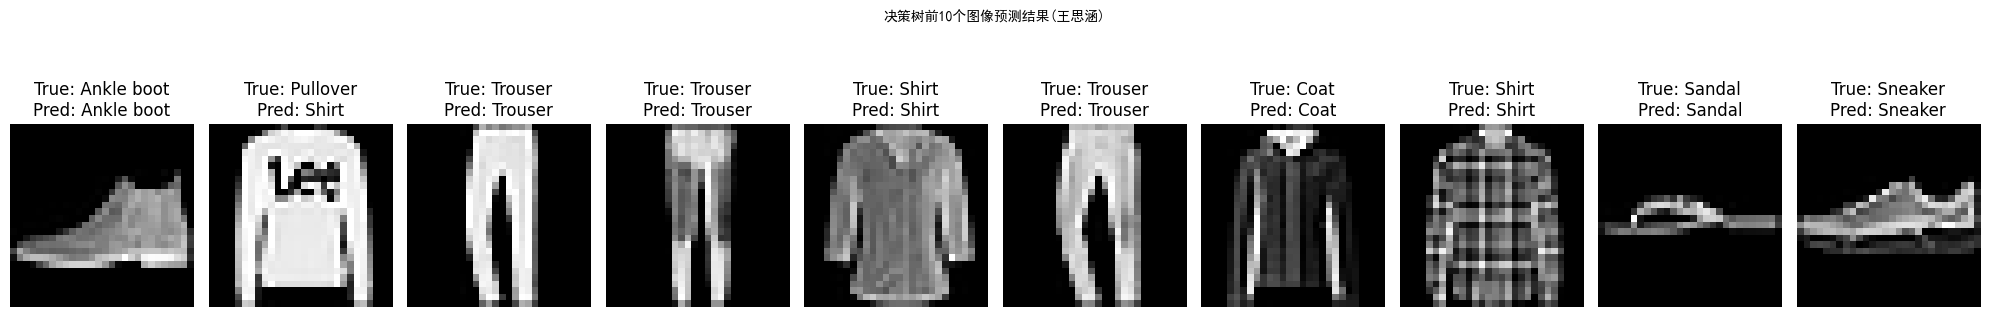

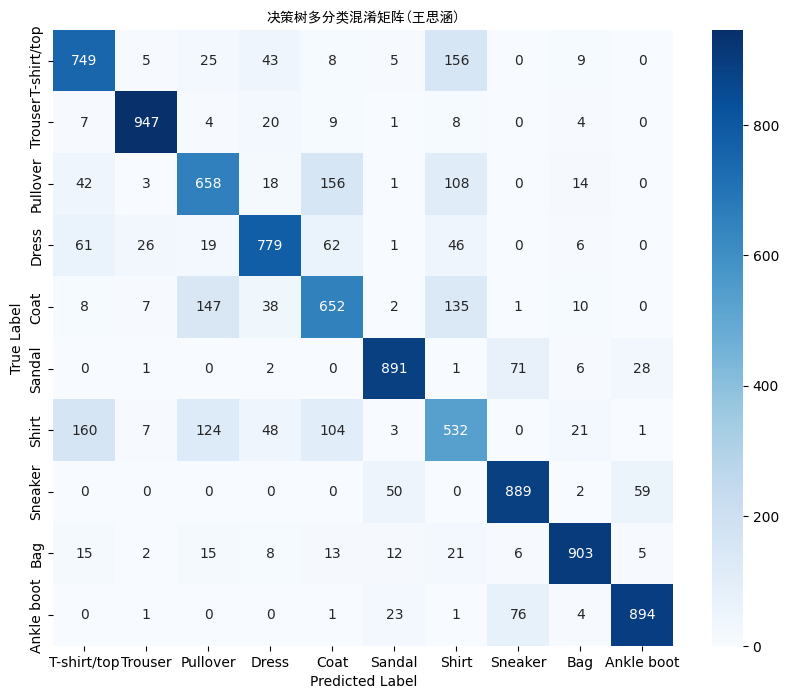

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import seaborn as sns
import matplotlib as mpl
# 定义类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

from google.colab import drive
drive.mount('/content/drive')
zhfont = mpl.font_manager.FontProperties(fname='/content/drive/MyDrive/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 可视化一些测试图像及其预测标签
def plot_images(images, labels, predictions, class_names, start_idx=0, num=10):
    plt.figure(figsize=(20, 4))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[start_idx + i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[labels[start_idx + i]]}\nPred: {class_names[predictions[start_idx + i]]}")
        plt.axis('off')
    plt.suptitle(u"决策树前10个图像预测结果(王思涵)",fontproperties = zhfont)
    plt.tight_layout()
    plt.show()

# 可视化前10个测试图像及其预测结果
plot_images(test_images, test_labels, test_predictions, class_names, start_idx=0, num=10)

# 可视化混淆矩阵
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(u"决策树多分类混淆矩阵(王思涵)",fontproperties = zhfont)
plt.show()

以上结果展示的是决策树模型预测测试集的前10个图像，同时展示了决策树在测试集上预测的混淆矩阵，可以看到决策树模型对Trouser的预测准确率最高，预测准确的个数达到了947。

# 基于KNN(K近邻算法)的服装图像分类

## 1 导入必要的包

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns

## 2 加载内置数据集并预处理

将图像数据展开为一维数组，将训练数据（28，28）的形状展开为748，将训练集的20%作为验证集

In [ ]:
# 加载数据
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 将图像数据展开为一维数组
n_samples, width, height = train_images.shape
train_images = train_images.reshape((n_samples, width * height))

n_samples, width, height = test_images.shape
test_images = test_images.reshape((n_samples, width * height))

# 将数据集划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


## 3 定义并训练KNN模型

定义KNN，这里K指定为5

In [ ]:
# 初始化k近邻分类器
knn_clf = KNeighborsClassifier(n_neighbors=5)

# 训练模型
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

## 4 模型验证

### 在验证集上进行预测

In [ ]:
# 在验证集上进行预测
val_predictions = knn_clf.predict(X_val)

# 输出验证集的分类报告和准确率
print("Validation Classification Report:\n", classification_report(y_val, val_predictions))
print("Validation Accuracy: ", accuracy_score(y_val, val_predictions))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      1202
           1       0.99      0.97      0.98      1219
           2       0.73      0.82      0.77      1205
           3       0.88      0.87      0.88      1184
           4       0.77      0.76      0.77      1202
           5       1.00      0.81      0.90      1211
           6       0.68      0.56      0.61      1218
           7       0.87      0.95      0.91      1159
           8       0.97      0.94      0.96      1197
           9       0.89      0.97      0.93      1203

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.86      0.85      0.85     12000

Validation Accuracy:  0.85275


上面结果展示的是KNN算法在验证集上的准确率以及各类别的机器学习指标，可以看出KNN算法在验证集上的准确率为85.28%

### 在测试集上进行预测

In [ ]:
# 在测试集上进行预测
test_predictions = knn_clf.predict(test_images)

# 输出测试集的分类报告和准确率
print("Test Classification Report:\n", classification_report(test_labels, test_predictions))
print("Test Accuracy: ", accuracy_score(test_labels, test_predictions))

Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.71      0.81      0.76      1000
           3       0.90      0.86      0.88      1000
           4       0.77      0.76      0.77      1000
           5       0.99      0.81      0.89      1000
           6       0.64      0.57      0.60      1000
           7       0.87      0.96      0.91      1000
           8       0.98      0.95      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Test Accuracy:  0.8493


上面结果展示的是KNN算法在测试集上的准确率以及各类别的机器学习指标，从图中可以看出KNN算法在测试集上的准确率为84.93%



## 5 结果可视化

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


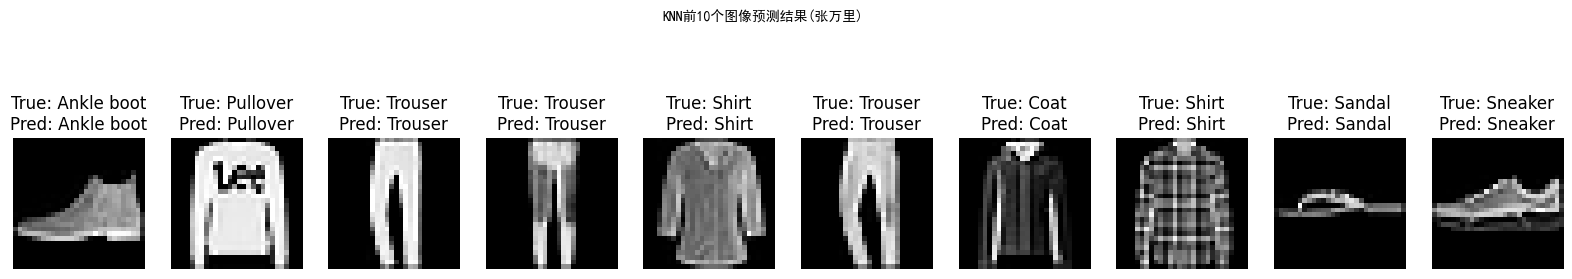

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import seaborn as sns
import matplotlib as mpl

# 定义类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
from google.colab import drive
drive.mount('/content/drive')
zhfont = mpl.font_manager.FontProperties(fname='/content/drive/MyDrive/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 可视化一些测试图像及其预测标签
def plot_images(images, labels, predictions, class_names, start_idx=0, num=10):
    plt.figure(figsize=(20, 4))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[start_idx + i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[labels[start_idx + i]]}\nPred: {class_names[predictions[start_idx + i]]}")
        plt.axis('off')
    plt.suptitle(u"KNN前10个图像预测结果(张万里)",fontproperties = zhfont)
    plt.show()

# 可视化前10个测试图像及其预测结果
plot_images(test_images, test_labels, test_predictions, class_names, start_idx=0, num=10)

以上展示的是KNN算法在测试集上的前10个图像预测结果

### 打印混淆矩阵

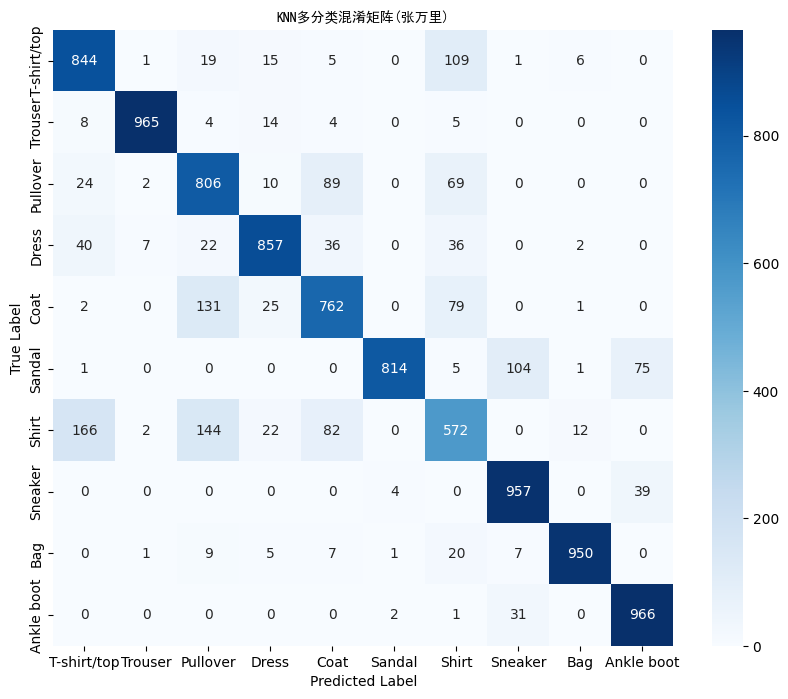

In [ ]:
# 可视化混淆矩阵
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(u"KNN多分类混淆矩阵(张万里)",fontproperties = zhfont)
plt.show()

展示了KNN算法在测试集上预测的混淆矩阵，可以看到KNN算法对Ankle Boot的预测准确率最高，预测准确的个数达到了966。

# 基于支持向量机（SVM）的服装图像分类

## 1 导入必要的包

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns

## 2 加载数据集并进行预处理

加载数据集，并将图像数据展开为一维数组，并归一化到[0, 1]范围内，同时将训练集的20%作为验证集

In [ ]:
# 加载数据
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 将图像数据展开为一维数组，并归一化到[0, 1]范围内
n_samples, width, height = train_images.shape
train_images = train_images.reshape((n_samples, width * height)) / 255.0

n_samples, width, height = test_images.shape
test_images = test_images.reshape((n_samples, width * height)) / 255.0

# 将数据集划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

## 3 定义支持向量机分类器并训练

这里指定SVM的核函数为线性

In [ ]:
# 初始化支持向量机分类器
svm_clf = SVC(kernel='linear', random_state=42)

# 训练模型
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

## 4 验证模型

### 在验证集上预测

In [ ]:
# 在验证集上进行预测
val_predictions = svm_clf.predict(X_val)

# 输出验证集的分类报告和准确率
print("Validation Classification Report:\n", classification_report(y_val, val_predictions))
print("Validation Accuracy: ", accuracy_score(y_val, val_predictions))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79      1202
           1       0.97      0.97      0.97      1219
           2       0.76      0.78      0.77      1205
           3       0.84      0.88      0.86      1184
           4       0.77      0.79      0.78      1202
           5       0.93      0.95      0.94      1211
           6       0.67      0.58      0.62      1218
           7       0.92      0.92      0.92      1159
           8       0.96      0.91      0.94      1197
           9       0.95      0.95      0.95      1203

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Validation Accuracy:  0.85375


以上展示的是支持向量机（SVM）在验证集上的准确率以及各类别的机器学习指标。从图中可以看出支持向量机（SVM）在验证集上的准确率为85.38%

### 在测试集上预测

In [ ]:
# 在测试集上进行预测
test_predictions = svm_clf.predict(test_images)

# 输出测试集的分类报告和准确率
print("Test Classification Report:\n", classification_report(test_labels, test_predictions))
print("Test Accuracy: ", accuracy_score(test_labels, test_predictions))

Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.72      0.76      0.74      1000
           3       0.83      0.84      0.84      1000
           4       0.76      0.77      0.76      1000
           5       0.94      0.94      0.94      1000
           6       0.64      0.56      0.60      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.92      0.94      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Test Accuracy:  0.8443


以上展示的是支持向量机（SVM）在测试集上的准确率以及各类别的机器学习指标。从图中可以看出支持向量机（SVM）在测试集上的准确率为84.43%

## 5 可视化结果

### 打印预测前10张图像结果

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


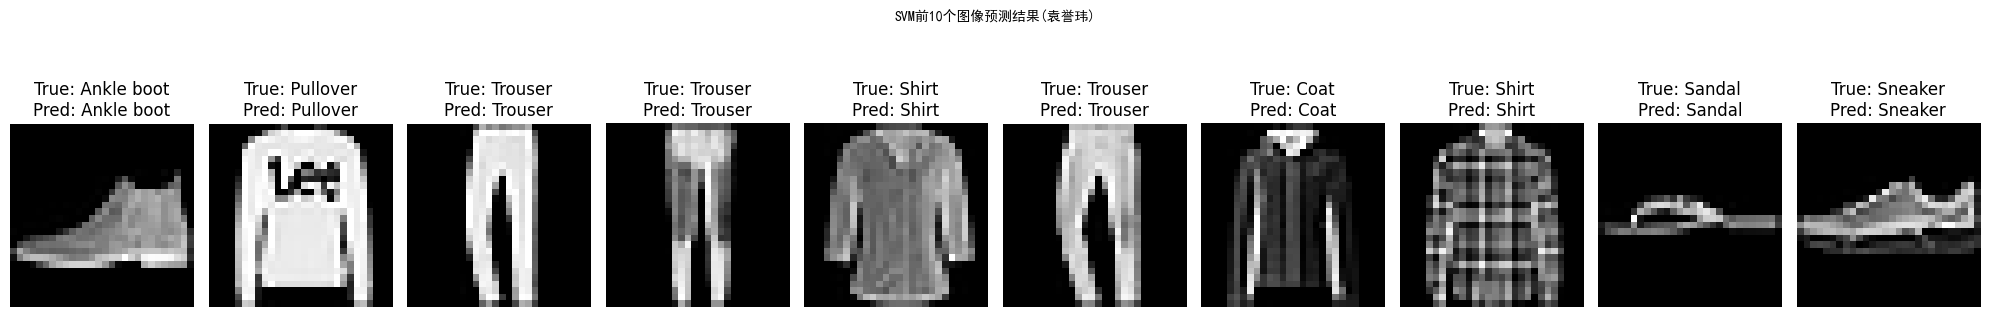

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import seaborn as sns
import matplotlib as mpl

# 定义类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

from google.colab import drive
drive.mount('/content/drive')
zhfont = mpl.font_manager.FontProperties(fname='/content/drive/MyDrive/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 可视化一些测试图像及其预测标签
def plot_images(images, labels, predictions, class_names, start_idx=0, num=10):
    plt.figure(figsize=(20, 4))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[start_idx + i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[labels[start_idx + i]]}\nPred: {class_names[predictions[start_idx + i]]}")
        plt.axis('off')
    plt.suptitle(u"SVM前10个图像预测结果(袁誉玮)",fontproperties = zhfont)
    plt.tight_layout()
    plt.show()

# 可视化前10个测试图像及其预测结果
plot_images(test_images * 255, test_labels, test_predictions, class_names, start_idx=0, num=10)


以上展示了支持向量机（SVM）在测试集上的前10个图像预测结果

### 打印混淆矩阵

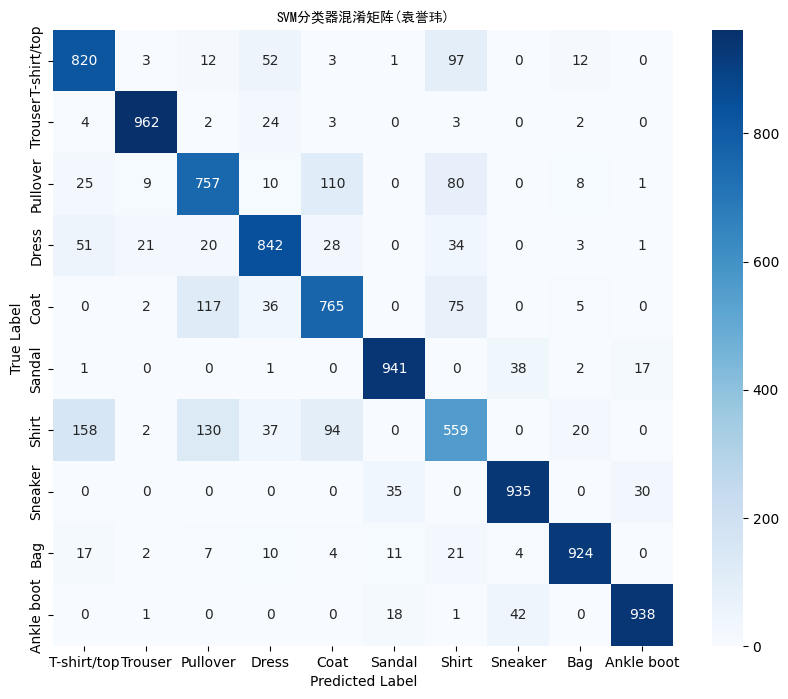

In [ ]:
# 可视化混淆矩阵
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(u"SVM分类器混淆矩阵(袁誉玮)",fontproperties = zhfont)
plt.show()

以上结果展示了支持向量机（SVM）在测试集上预测的混淆矩阵，可以看到支持向量机（SVM）对Trouser的预测准确率最高，预测准确的个数达到了962。

# 上述四种机器学习算法的对比

## 1 导入必要的包

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from itertools import cycle

## 2 加载数据集并预处理

In [ ]:
# 加载数据
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 将图像数据展开为一维数组，并归一化到[0, 1]范围内
n_samples, width, height = train_images.shape
train_images = train_images.reshape((n_samples, width * height)) / 255.0

n_samples, width, height = test_images.shape
test_images = test_images.reshape((n_samples, width * height)) / 255.0

# 将数据集划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# 标签二值化
y_train_bin = label_binarize(y_train, classes=np.arange(10))
y_val_bin = label_binarize(y_val, classes=np.arange(10))
y_test_bin = label_binarize(test_labels, classes=np.arange(10))
n_classes = y_train_bin.shape[1]

## 3 初始化上述四种分类器

In [ ]:
# 初始化分类器
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

## 4 训练并预测

In [ ]:
# 训练并预测
probas = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    probas[name] = clf.predict_proba(test_images)


## 5 绘制ROC曲线

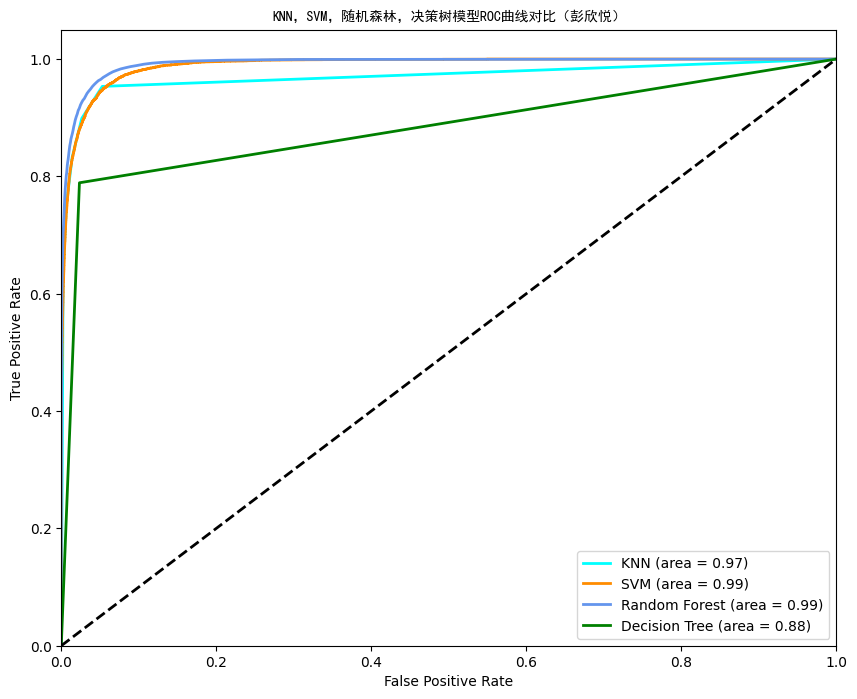

In [ ]:
# 绘制ROC曲线
plt.figure(figsize=(10, 8))

# Define a color cycle for the plots
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])

for (name, probs), color in zip(probas.items(), colors):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr["micro"], tpr["micro"], color=color, lw=2,
             label=f'{name} (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(u"KNN，SVM，随机森林，决策树模型ROC曲线对比（彭欣悦）",fontproperties = zhfont)
plt.legend(loc="lower right")
plt.show()

从以上结果可以看出SVM分类器的性能和随机森林的性能要好于其他两者，AUC值到达了0.99

# 基于卷积神经网络的服装图像分类

上述实验利用人工神经网络对服装数据集Fashion Mnist进行分类，但是效果并不好，以下实验利用深度学习领域中擅长处理图像的卷积神经网络，对服装图像进行分类。

##1 定义卷积神经网络模型

设置神经网络的超参数，将训练集分为若干个batch，每个batch的大小为16

In [ ]:
batch_size = 16 #每个batch的大小
nb_classes = len(class_names)  #分类的种数
nb_epochs = 10 #完成全部权重更新的次数
img_rows, img_columns = 28, 28 #图片的尺寸大小
nb_filters = 16 #过滤器的个数

开始构建神经网络，使用keras库中的Sequential线性构建神经网络。

卷积层的激活函数使用relu函数，可以简化计算从而加快收敛并且一定程度上避免梯度消失。

padding设置为same，则说明输入图片大小和输出图片大小是一致的

卷积核的大小设置为3x3，便于提取较小的特征，个数均为16个，便于提取多个特征。

最大池化层大小为2x2,步长设置为2，将输出图片的宽度和高度变为原来的一半，经过两次卷积-池化操作之后，使用dropout随机去除一些神经网络节点来正则化，这在卷积神经网络的训练中很重要，每个结点被去除的概率为0.5。

之后将所有参数展开，再加一层全连接，最后使用softmax实现多分类

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu, #第一卷积层
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2), #池化层
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu), #卷积层
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),  #池化层
    tf.keras.layers.Dropout(0.5), #使用dropout失活正则化
    tf.keras.layers.Flatten(),  #将输出展开
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  #全连接层
    tf.keras.layers.Dense(nb_classes,  activation=tf.nn.softmax) #使用softmax实现多分类
])

确定模型使用的优化方法，损失函数和评测指标

这里使用adam优化器，损失函数使用交叉熵损失函数，评价指标使用准确度

In [ ]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## 2 数据预处理

之前对训练数据进行了归一化，这里对训练集标签以及测试集标签进行独热编码，转化成一个1X10的向量

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0

test_images = test_images / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10) #进行独热编码
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10) #进行独热编码

## 3 训练卷积神经网络

In [ ]:
cnn_history = cnn_model.fit(train_images, train_labels, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_split=0.2)

Epoch 1/10
3000/3000 [==============================] - 18s 5ms/step - loss: 0.5242 - accuracy: 0.8067 - val_loss: 0.3655 - val_accuracy: 0.8685
Epoch 2/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3788 - accuracy: 0.8622 - val_loss: 0.3030 - val_accuracy: 0.8873
Epoch 3/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3333 - accuracy: 0.8748 - val_loss: 0.2833 - val_accuracy: 0.8936
Epoch 4/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3072 - accuracy: 0.8853 - val_loss: 0.2604 - val_accuracy: 0.9019
Epoch 5/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.2910 - accuracy: 0.8917 - val_loss: 0.2568 - val_accuracy: 0.9030
Epoch 6/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.2777 - accuracy: 0.8951 - val_loss: 0.2569 - val_accuracy: 0.9038
Epoch 7/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.2675 - accuracy: 0.8995 - val_loss: 0.2509 - val_ac

从训练结果可以看出，模型在训练集上的准确率在90%左右，在验证集上的准确率在91%以上，这说明模型在验证集上的表现要比普通的人工神经网络要好。

查看卷积神经网络模型参数

In [ ]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)              

## 4 结果评估

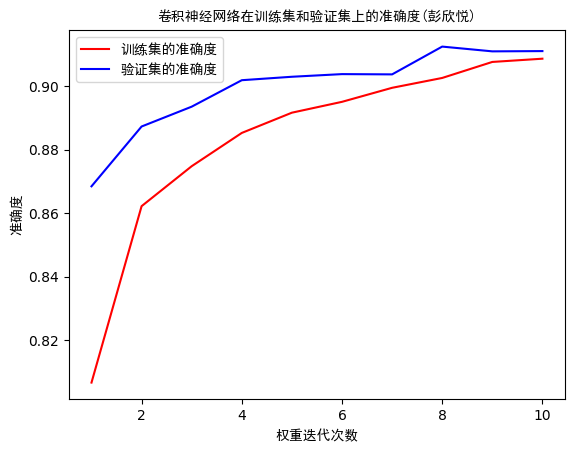

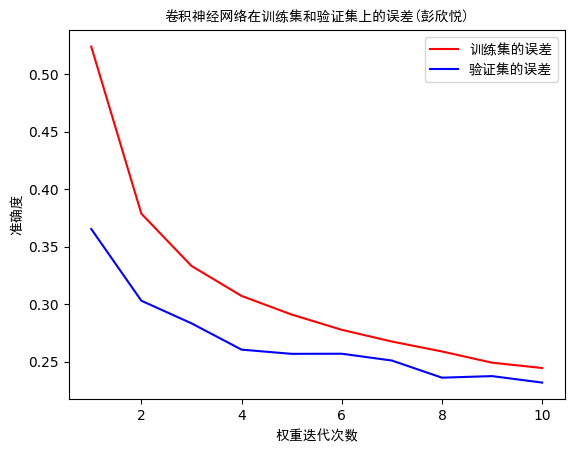

In [ ]:
acc = cnn_history.history['accuracy']  #获取训练集准确性数据
val_acc = cnn_history.history['val_accuracy'] #获取验证集准确性数据
loss = cnn_history.history['loss']   #获取训练集错误值数据
val_loss = cnn_history.history['val_loss'] #获取验证集错误值数据
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'r')  #以epochs为横坐标，以训练集准确性为纵坐标
plt.plot(epochs,val_acc,'b') #以epochs为横坐标，以验证集准确性为纵坐标
plt.xlabel(u"权重迭代次数",fontproperties = zhfont)
plt.ylabel(u"准确度",fontproperties = zhfont)
plt.title(u"卷积神经网络在训练集和验证集上的准确度(彭欣悦)",fontproperties = zhfont)
plt.legend([u'训练集的准确度',u'验证集的准确度'],prop = zhfont) #绘制图例，即标明图中的线段代表何种含义

plt.figure() #创建一个新的图表
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.xlabel(u"权重迭代次数",fontproperties = zhfont)
plt.ylabel(u"准确度",fontproperties = zhfont)
plt.title(u"卷积神经网络在训练集和验证集上的误差(彭欣悦)",fontproperties = zhfont)
plt.legend([u'训练集的误差',u'验证集的误差'],prop = zhfont) #绘制图例，即标明图中的线段代表何种含义

plt.show() #显示所有图表

In [ ]:
score = cnn_model.evaluate(test_images, test_labels, verbose = 0 )
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.24569104611873627
Test accuracy:  0.9086999893188477


可以看到测试的准确度达到91%以上,这比人工神经网络要高，泛化能力更强，模型表现能力更好。

## 5 保存模型

In [ ]:
# 保存模型用于后续使用
cnn_model.save("cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.3 MB/

将fashionmnist数据集保存为图像

In [ ]:
import tensorflow as tf
import os
from PIL import Image

# 加载FashionMNIST数据集
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 输出目录
output_dir = 'fashionmnist/png/images'
os.makedirs(output_dir, exist_ok=True)

def save_images_as_png(images, labels, output_dir):
    for i, (image, label) in enumerate(zip(images, labels)):
        class_dir = os.path.join(output_dir, str(label))
        os.makedirs(class_dir, exist_ok=True)
        image_path = os.path.join(class_dir, f'image_{i}.png')
        # 将numpy数组转换为PIL图像
        pil_image = Image.fromarray(image)
        # 保存图像为PNG格式
        pil_image.save(image_path)
        print(f'Saved image {i+1}/{len(images)} with label {label} as {image_path}')

# 保存训练集图像
save_images_as_png(train_images, train_labels, os.path.join(output_dir, 'train'))

# 保存测试集图像
save_images_as_png(test_images, test_labels, os.path.join(output_dir, 'test'))


流式输出内容被截断，只能显示最后 5000 行内容。
Saved image 5001/10000 with label 2 as fashionmnist/png/images/test/2/image_5000.png
Saved image 5002/10000 with label 3 as fashionmnist/png/images/test/3/image_5001.png
Saved image 5003/10000 with label 6 as fashionmnist/png/images/test/6/image_5002.png
Saved image 5004/10000 with label 4 as fashionmnist/png/images/test/4/image_5003.png
Saved image 5005/10000 with label 6 as fashionmnist/png/images/test/6/image_5004.png
Saved image 5006/10000 with label 3 as fashionmnist/png/images/test/3/image_5005.png
Saved image 5007/10000 with label 6 as fashionmnist/png/images/test/6/image_5006.png
Saved image 5008/10000 with label 9 as fashionmnist/png/images/test/9/image_5007.png
Saved image 5009/10000 with label 4 as fashionmnist/png/images/test/4/image_5008.png
Saved image 5010/10000 with label 9 as fashionmnist/png/images/test/9/image_5009.png
Saved image 5011/10000 with label 0 as fashionmnist/png/images/test/0/image_5010.png
Saved image 5012/10000 with label 8 as

## 6 使用gradio创建展示界面
可以用gradio来创建图形页面方便展示机器学习demo


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2

NUM_CLASS = 10

def predict(img):
    # 加载模型
    model = tf.keras.models.load_model('cnn_model.h5')

    # 将图像转换为灰度图像
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 调整大小为28x28
    resized_img = cv2.resize(gray_img, (28, 28))

    # 归一化并调整形状
    img = resized_img.reshape((1, 28, 28, 1)).astype('float32') / 255.0

    # 预测
    predict_score = model.predict(img)

   # 使用Softmax函数将输出转换为概率分布
    probabilities = tf.nn.softmax(predict_score).numpy()[0]

    # 获取概率最高的类别索引
    predicted_class_index = np.argmax(probabilities)

    return class_names[predicted_class_index]

gr.Interface(fn=predict,
             inputs=gr.Image(),
             outputs=gr.Label(num_top_classes=NUM_CLASS, label="预测类别")).launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4da3bbc4fa1faaeade.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
